In [1]:
# 7 attributes:  
# | names file (C4.5 format) for car evaluation domain

# | class values

# unacc, acc, good, vgood

# | attributes

# buying:   vhigh, high, med, low.
# maint:    vhigh, high, med, low.
# doors:    2, 3, 4, 5more.
# persons:  2, 4, more.
# lug_boot: small, med, big.
# safety:   low, med, high.

In [2]:
# import data science libraries
# pandas: for analyzing and manipulating datasets\
import pandas as pd
# numpy: library for arrays and additional mathematical functions
import numpy as np
# matplotlib: data visualizer
import matplotlib.pyplot as plt
# scikit-learn: tool for predictive data analysis
from sklearn.tree import DecisionTreeClassifier # decision tree classifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
# import classification report
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

In [3]:
# predefined columns
attributes_col = ['buying','maint','doors','persons','lug_boot','safety','class']
# load data set
cars = pd.read_csv('car_evaluation.csv', header=None, names=attributes_col)
# print head
cars.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
# check dataset dimension
cars.shape

(1728, 7)

In [5]:
# check for names
cars.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

In [6]:
# check for missing values
cars.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [7]:
# check for dataset distribution
cars['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

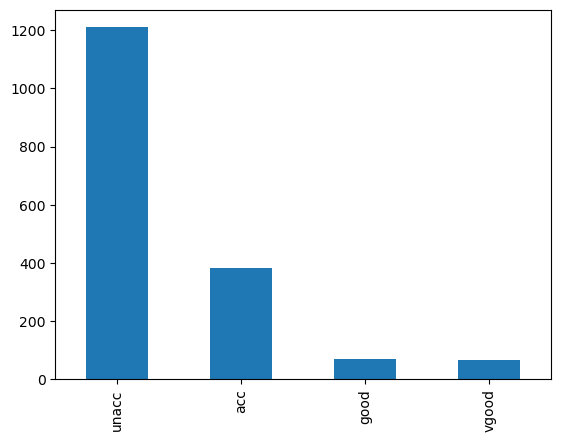

In [8]:
# plot distribution class
cars['class'].value_counts().plot(kind = 'bar')
plt.show()

In [9]:
# check data type
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [10]:
# split dataset into features and target variables
features = ['buying','maint','doors','persons','lug_boot','safety']
X = cars[['buying','maint','doors','persons','lug_boot','safety']] # features (x)
y = cars['class'] # target var (y)

In [11]:
# feature extraction
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# initialize count vectorizer
cv = CountVectorizer()
# initialize tfidf vectorizer
tfidf = TfidfVectorizer()

X = tfidf.fit_transform(cars['buying']).toarray()

In [12]:
# preprocessing dataset 
# ordinal encoding
from sklearn.preprocessing import OrdinalEncoder
buying_price_category = ['low', 'med', 'high', 'vhigh']
maint_cost_category = ['low', 'med', 'high', 'vhigh']
doors_category = ['2', '3', '4', '5more']
person_capacity_category = ['2', '4', 'more']
lug_boot_category = ['small', 'med', 'big']
safety_category = ['low', 'med', 'high']
all_categories = [buying_price_category, maint_cost_category, doors_category, person_capacity_category, lug_boot_category, safety_category]
# start encoding
OrdEnc = OrdinalEncoder(categories=all_categories)
X = OrdEnc.fit_transform(cars[['buying','maint','doors','persons','lug_boot','safety']])

In [13]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=0.1)
X = selection.fit_transform(X)

In [14]:
# split the dataset into training set and test set
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=2) # train set 70% , test set 30%

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


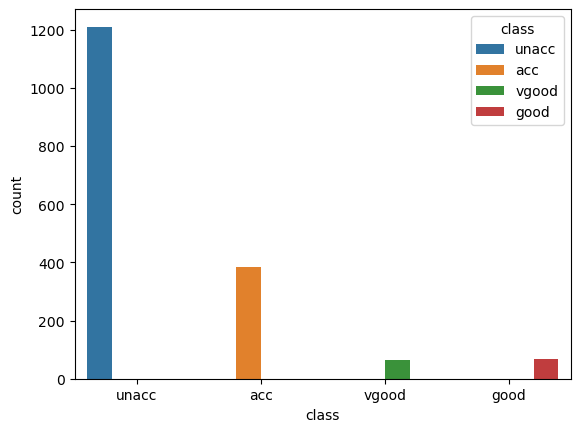

In [15]:
# feature distribution
import seaborn as sn
sn.countplot(cars['class'], hue=cars['class'])
plt.show()

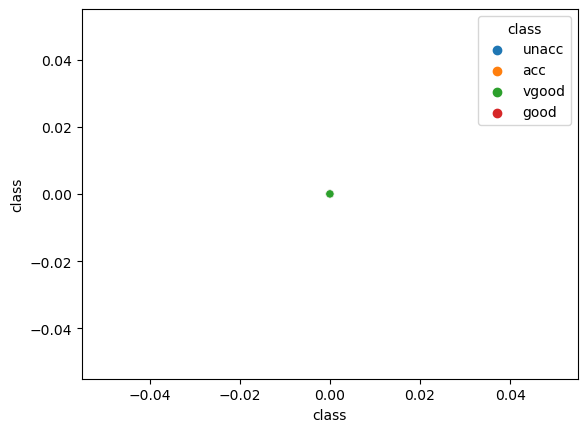

In [23]:
sn.scatterplot(data=cars, x=cars['class']=='buying', y=cars['class']=='doors', hue=cars['class'])
plt.show()

In [17]:
# model development
# decision tree classifier
dtc = DecisionTreeClassifier(criterion='gini',max_depth=3, min_samples_split=10)
# train dataset
dtc = dtc.fit(X_train, y_train)
# check for model accuracy with the input criterion
# predict the y_test
y_pred = dtc.predict(X_test)
# check for model accuracy with the criterion
#score = metrics.accuracy_score(y_test, y_pred);
print(classification_report(y_test, y_pred, zero_division=0.0))

              precision    recall  f1-score   support

         acc       0.54      0.56      0.55       114
        good       0.00      0.00      0.00        23
       unacc       0.88      0.96      0.91       367
       vgood       0.00      0.00      0.00        15

    accuracy                           0.80       519
   macro avg       0.35      0.38      0.37       519
weighted avg       0.74      0.80      0.77       519



In [18]:
# dtc with feature extraction
from sklearn.decomposition import FastICA

ica = FastICA(n_components=6)
X_train_ica = ica.fit_transform(X_train)

X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_train_ica, y_train, test_size=0.3, random_state=2) 

# train dataset
dtc = dtc.fit(X_train_red, y_train_red)
# check for model accuracy with the input criterion
# predict the y_test
y_pred_red = dtc.predict(X_test_red)
# check for model accuracy with the criterion
#score = metrics.accuracy_score(y_test, y_pred);
print(classification_report(y_test_red, y_pred_red, zero_division=0.0))

              precision    recall  f1-score   support

         acc       0.60      0.56      0.58        85
        good       0.00      0.00      0.00         7
       unacc       0.87      0.95      0.91       258
       vgood       0.00      0.00      0.00        13

    accuracy                           0.81       363
   macro avg       0.37      0.38      0.37       363
weighted avg       0.76      0.81      0.78       363



In [19]:
# multinomial naive bayes
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()

nb = nb.fit(X_train, y_train)

nb_y_pred = nb.predict(X_test)

print(classification_report(y_test, nb_y_pred))

              precision    recall  f1-score   support

         acc       0.12      0.03      0.04       114
        good       1.00      0.09      0.16        23
       unacc       0.74      0.99      0.85       367
       vgood       1.00      0.07      0.12        15

    accuracy                           0.71       519
   macro avg       0.72      0.29      0.29       519
weighted avg       0.63      0.71      0.62       519



In [ ]:
# neural network
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier()

mlp = mlp.fit(X_train, y_train)

mlp_y_pred = mlp.predict(X_test)

print(classification_report(y_test, mlp_y_pred))

              precision    recall  f1-score   support

         acc       0.86      0.82      0.84       114
        good       0.74      0.87      0.80        23
       unacc       0.95      0.97      0.96       367
       vgood       0.90      0.60      0.72        15

    accuracy                           0.92       519
   macro avg       0.86      0.81      0.83       519
weighted avg       0.92      0.92      0.92       519



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


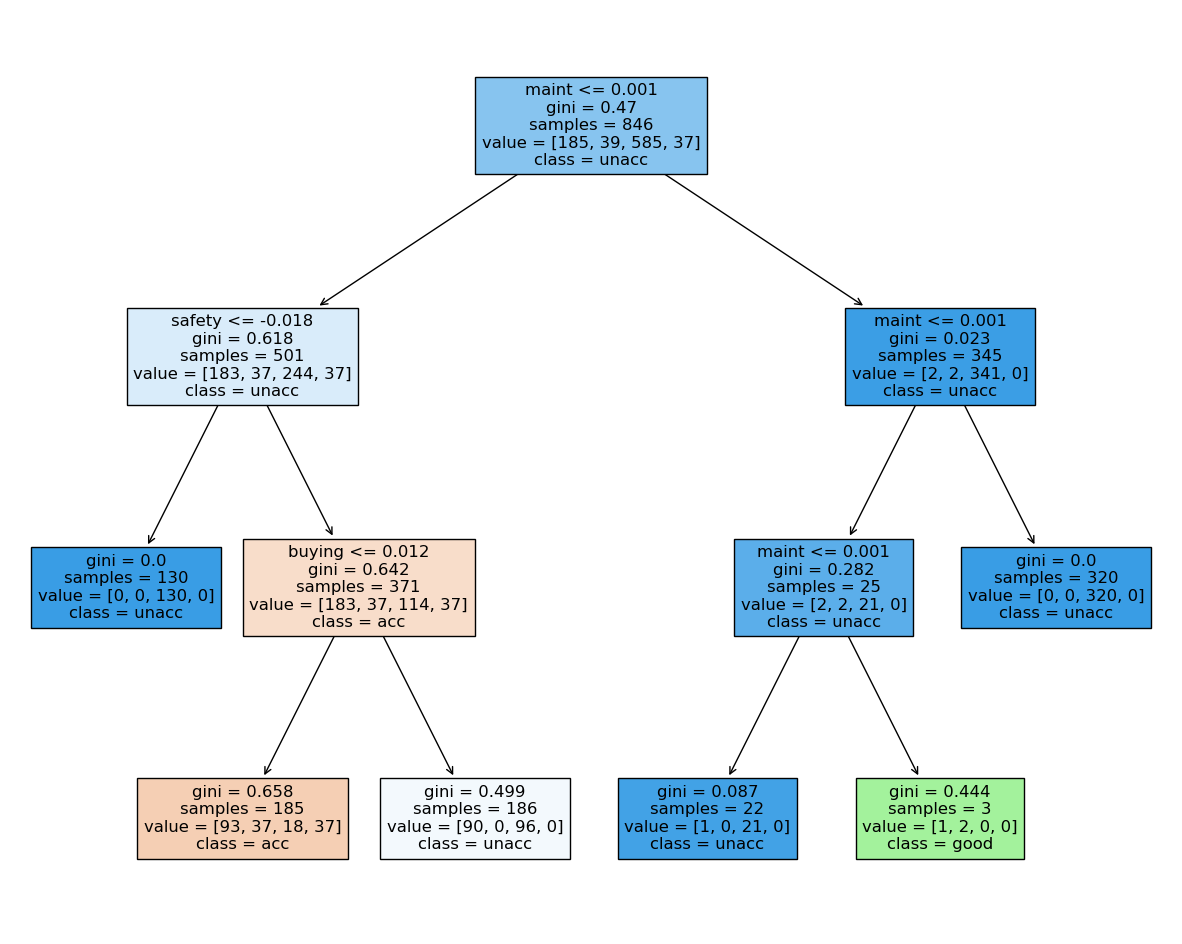

In [ ]:
# dtc model visaulizer
from sklearn import tree
figure = plt.figure(figsize=(15,12))
_ = tree.plot_tree(dtc, feature_names=cars.columns[:-1], class_names=dtc.classes_, filled=True)